## Visualización COVID

Basado en el estudio de https://github.com/therealcyberlord

Analisis de los datos de la expansión del último coronavirus (SARS-CoV-2) llamado por la OMS oficialmente COVID-19, un virus respiratorio altamente contagioso que apareció en Wuhan en Diciembre del 2019. 

- Data: https://github.com/CSSEGISandData/COVID-19 Repositorio propiedad de Johns Hopkins..
- Enlace al artículo sobre el COVID-19 en la OMS  https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- Enlace al artículo en el CDC https://www.cdc.gov/coronavirus/2019-ncov
- visualización de los datos con ARCGIS https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

<img src='https://newsfortomorrow.com/wp-content/uploads/2020/01/1578562454_Wuhan-pneumonia-New-coronavirus-related-to-SARS-idenitified.jpg'>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates 
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

## Carga online de los datos
Los cargamos a partir del repositorio de Johns Hopkins en git

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


## Vista de Detalle
Gráficas con la evolución de contagios en un país específico, a seleccionar más abajo

In [4]:
 np.sort(confirmed_df["Country/Region"].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guyana', 'Hait

### Poner aquí abajo el pais elegido de la lista de arriba

In [5]:
pais_elegido = "Spain"

pais_versus = "Italy"

In [6]:
# Me quedo con las fechas nada mas, de la columna 4 en adelante. Las usaré de pie de gráficos por claridad
cols = confirmed_df.columns
col_fechas_ind = cols[4:]

#las paso a fecha
x_values = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in col_fechas_ind.values]

In [7]:
# chequeo Pais
esp_confirmed = confirmed_df[confirmed_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind]
esp_confirmed_y = esp_confirmed.values[0]

esp_total_deaths = deaths_df[deaths_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]
esp_total_recovery = recoveries_df[recoveries_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]


In [8]:


itl_confirmed = confirmed_df[confirmed_df["Country/Region"]==pais_versus].groupby("Country/Region").sum().loc[:, col_fechas_ind]
itl_confirmed_y = esp_confirmed.values[0]

iterador = list (itl_confirmed)
for i in iterador: 
    if itl_confirmed[i][0] != 0:
        itl_fecha_1er_infectado =  i
        break
print (itl_fecha_1er_infectado)

1/31/20


In [9]:
limpio2 = []
iterador = list (itl_confirmed)
for i in iterador: 
    if itl_confirmed[i][0] != 0:
        conf = itl_confirmed[i][0]
        limpio2.append (conf)
        

In [10]:
limpio1 = []
iterador = list (esp_confirmed)
for i in iterador: 
    if esp_confirmed[i][0] != 0:
        conf = esp_confirmed[i][0]
        limpio1.append (conf )

limpio2 = limpio2[:len(limpio1)]


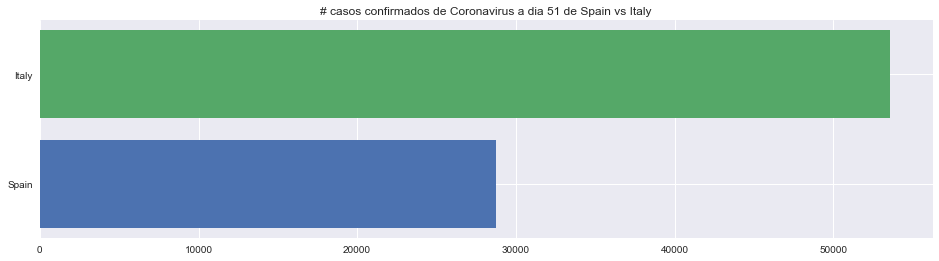

In [11]:
plt.figure(figsize=(16, 4))
plt.barh(pais_elegido, limpio1)
plt.barh(pais_versus, limpio2)
plt.title('# casos confirmados de Coronavirus a dia {} de {} vs {}'.format(len(limpio1), pais_elegido, pais_versus))
plt.show()

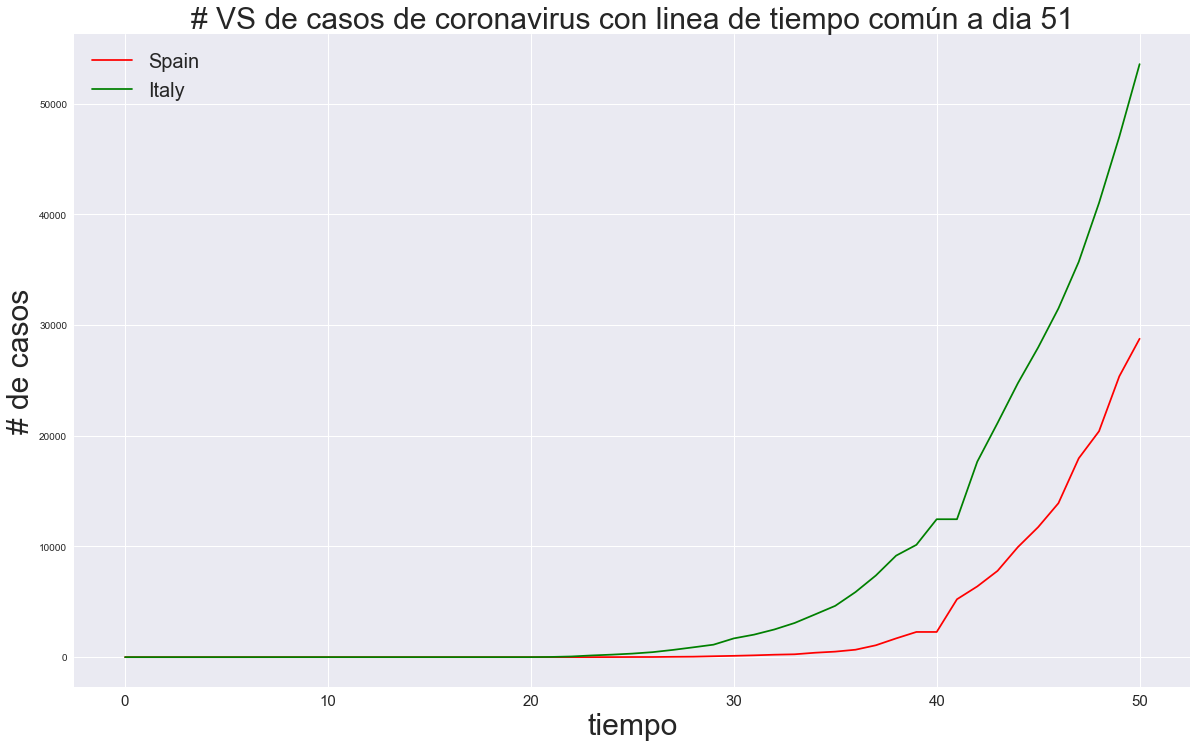

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(limpio1, color='r')
plt.plot(limpio2, color='green')
plt.legend([pais_elegido, pais_versus], loc='best', fontsize=20)
plt.title('# VS de casos de coronavirus con linea de tiempo común a dia {}'.format(len(limpio1)), size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()

In [13]:

esp_mortality_rate = []

# totalizamos en un array los ratios
for i in range(len(esp_total_deaths)):
    if (esp_confirmed_y[i] == 0):
        esp_mortality_rate.append(0)
    else:    
        esp_mortality_rate.append(esp_total_deaths[i]/esp_confirmed_y[i])


In [14]:
esp_tasa_crecimiento = []

for i in range(len(esp_confirmed_y)):
    if i>0 :
        esp_tasa_crecimiento.append (esp_confirmed_y[i]-esp_confirmed_y[i-1])
    else :
        esp_tasa_crecimiento.append(0)

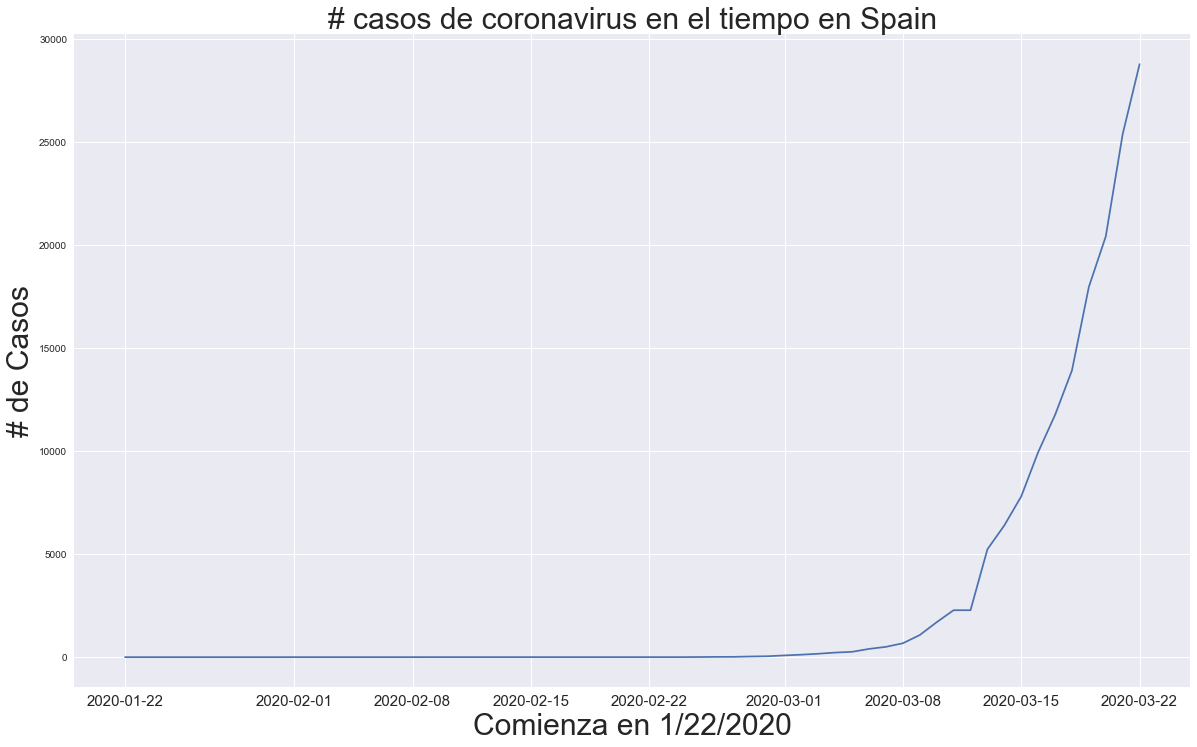

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_confirmed_y)
plt.title('# casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

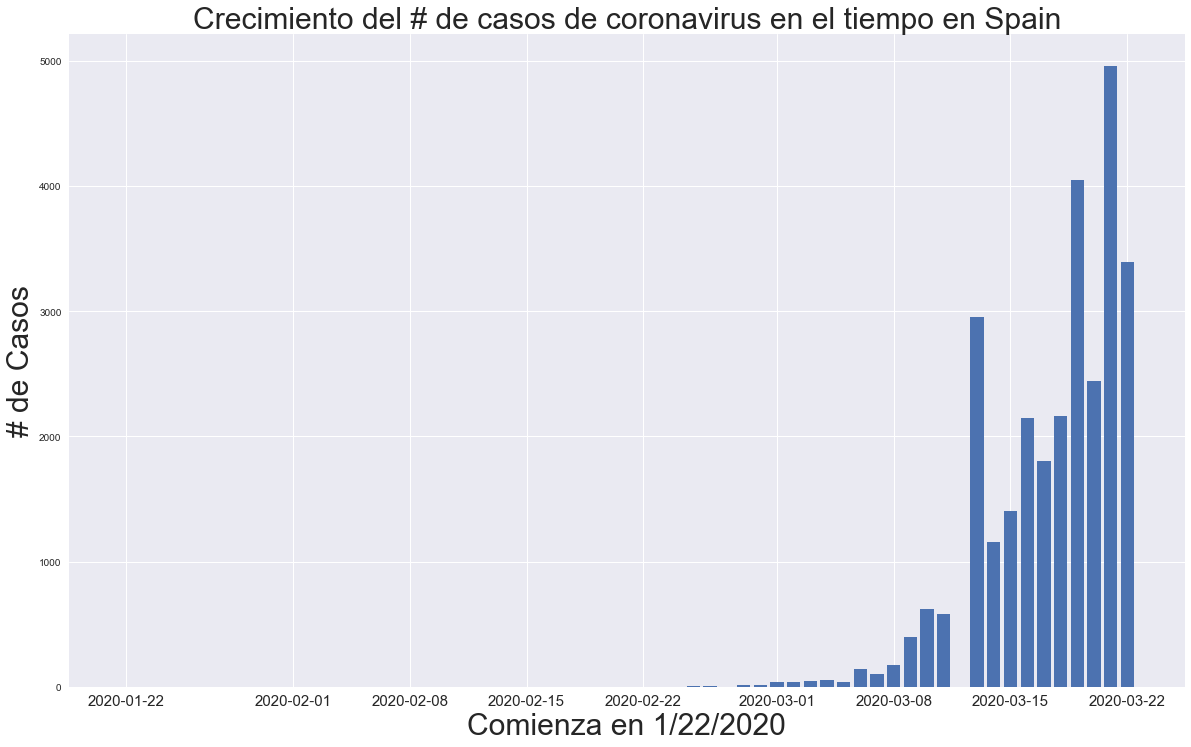

In [16]:
plt.figure(figsize=(20, 12))
plt.bar(x_values, esp_tasa_crecimiento)
plt.title('Crecimiento del # de casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

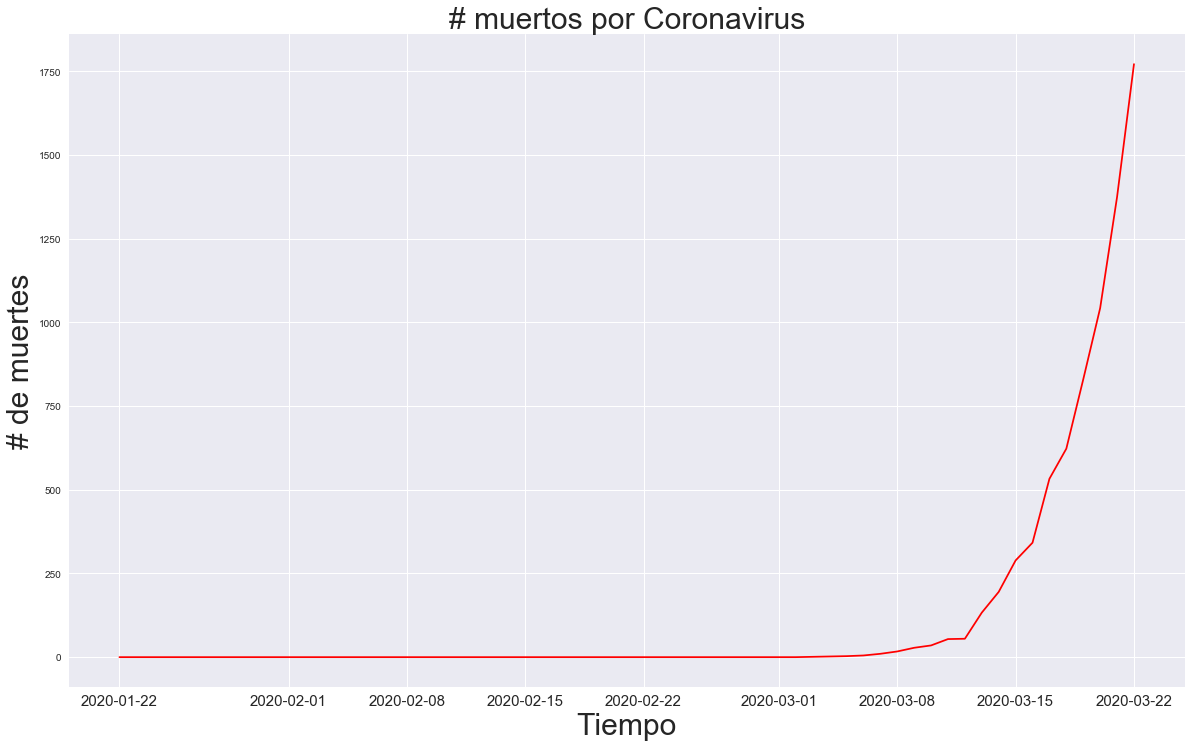

In [17]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='red')
plt.title('# muertos por Coronavirus', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('# de muertes', size=30)
plt.xticks(size=15)
plt.show()

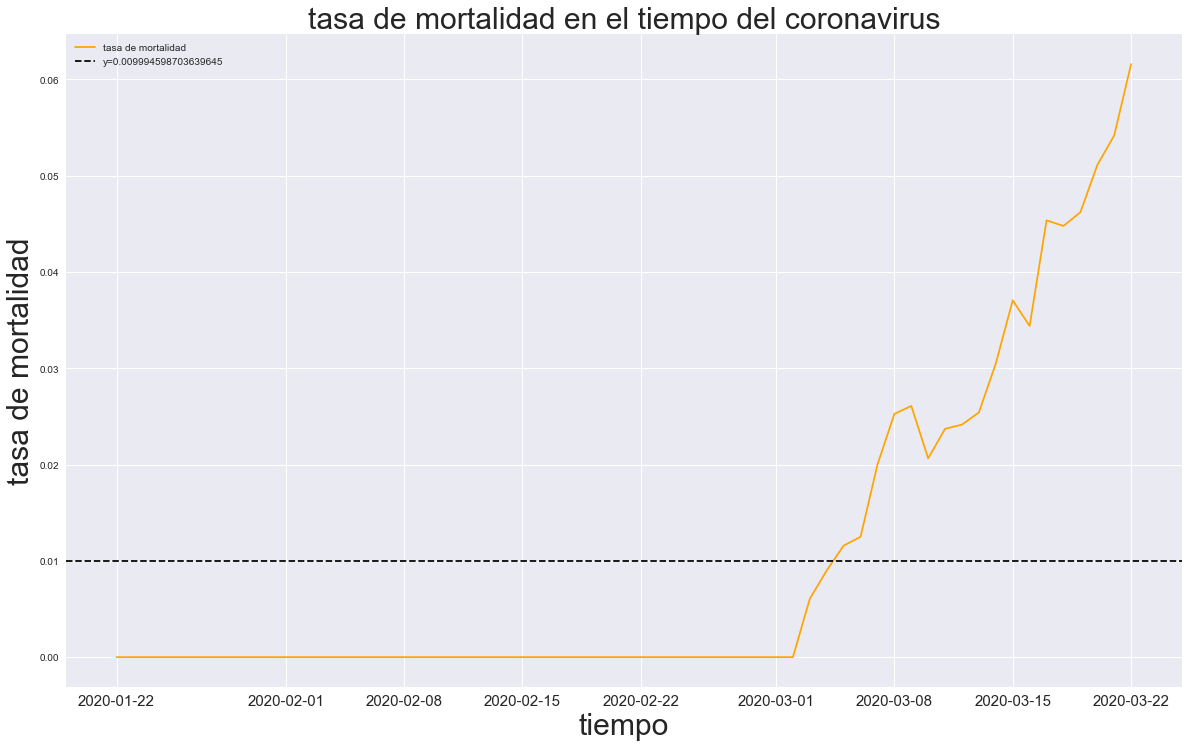

In [18]:
esp_mean_mortality_rate = np.mean(esp_mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_mortality_rate, color='orange')
plt.axhline(y = esp_mean_mortality_rate,linestyle='--', color='black')
plt.title('tasa de mortalidad en el tiempo del coronavirus', size=30)
plt.legend(['tasa de mortalidad', 'y='+str(esp_mean_mortality_rate)])
plt.xlabel('tiempo', size=30)
plt.ylabel('tasa de mortalidad', size=30)
plt.xticks(size=15)
plt.show()


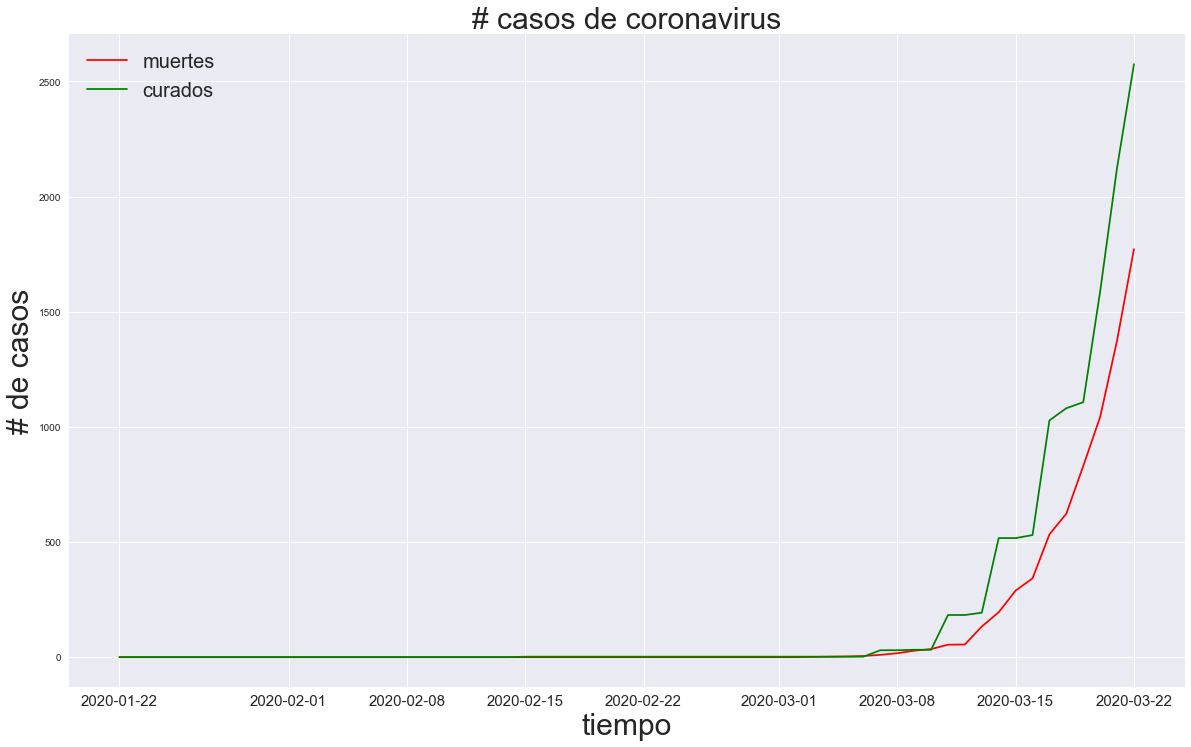

In [19]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='r')
plt.plot(x_values, esp_total_recovery, color='green')
plt.legend(['muertes', 'curados'], loc='best', fontsize=20)
plt.title('# casos de coronavirus', size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()


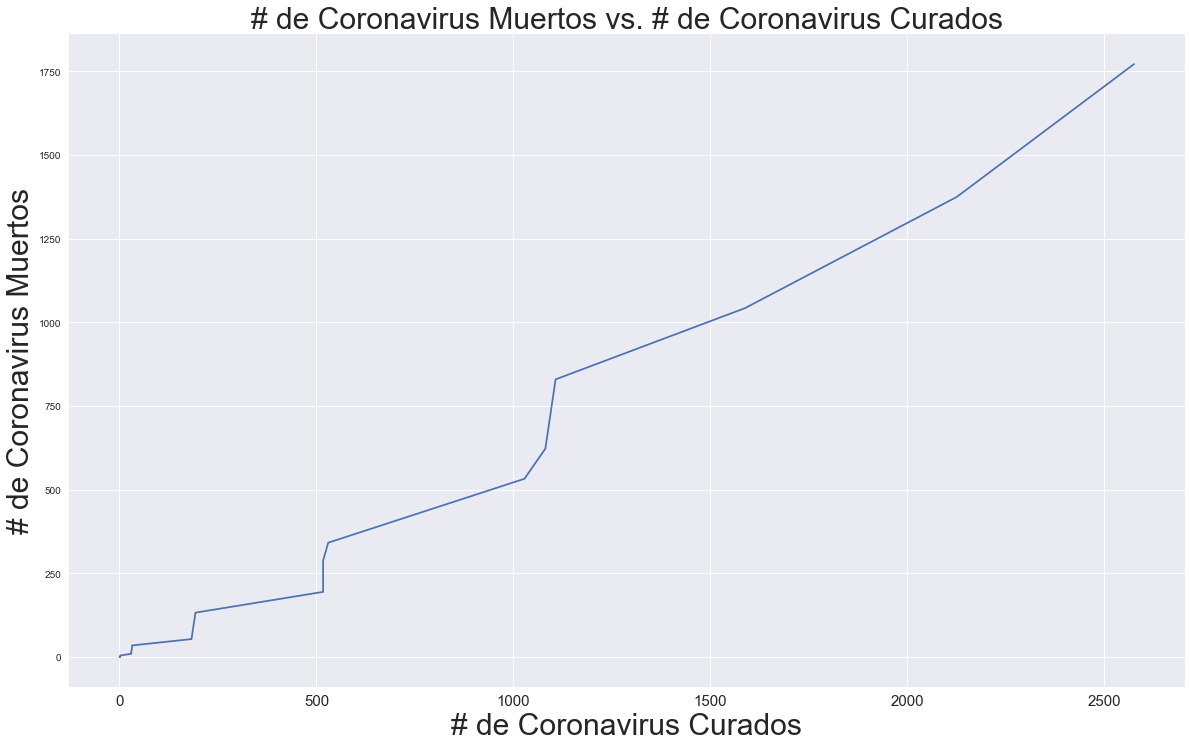

In [20]:
plt.figure(figsize=(20, 12))
plt.plot(esp_total_recovery, esp_total_deaths)
plt.title('# de Coronavirus Muertos vs. # de Coronavirus Curados', size=30)
plt.xlabel('# de Coronavirus Curados', size=30)
plt.ylabel('# de Coronavirus Muertos', size=30)
plt.xticks(size=15)
plt.show()

# Estudio global

Me quedo con los datos numéricos nada más, asi que cojo solo las col_fechas_ind.

In [21]:
confirmed = confirmed_df.loc[:, col_fechas_ind]
deaths = deaths_df.loc[:, col_fechas_ind]
recoveries = recoveries_df.loc[:, col_fechas_ind]

Creamos arrays  con todo

In [22]:
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

# totalizamos en un array los resultados
for i in col_fechas_ind:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


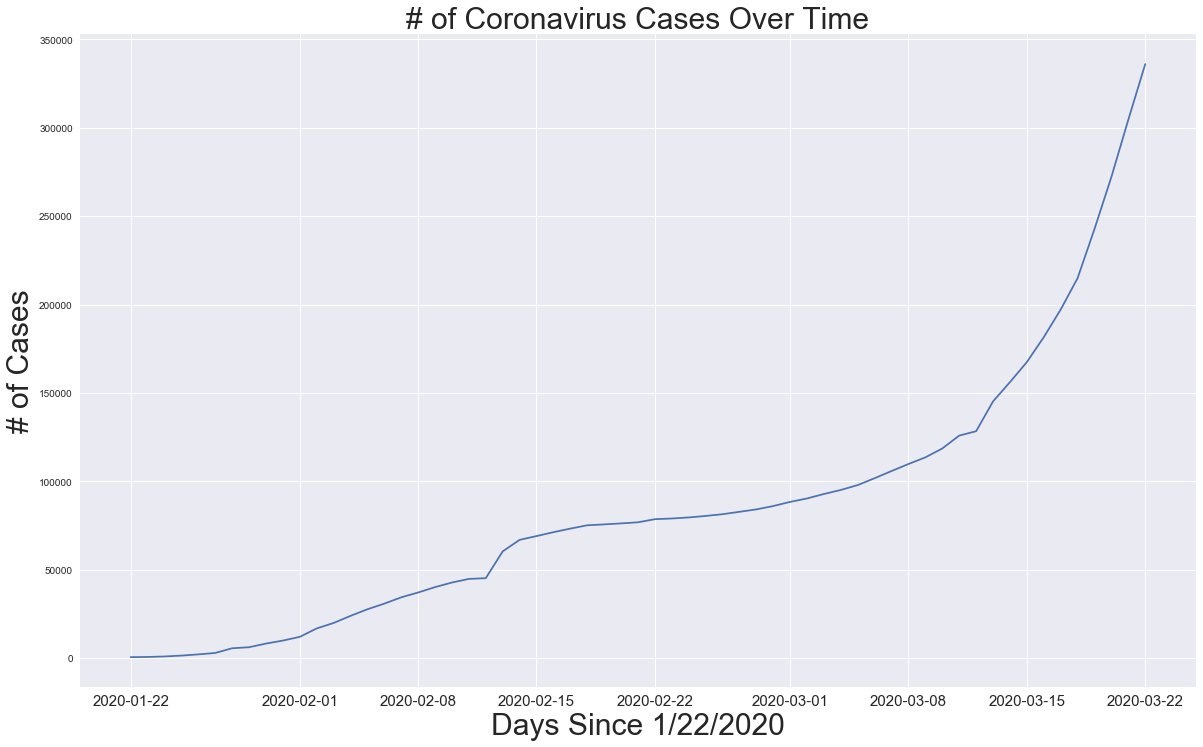

In [23]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

Representaremos el númerode casos confirmados, recuperaciones, muertes y ratio de mortalidad a través del tiempo.

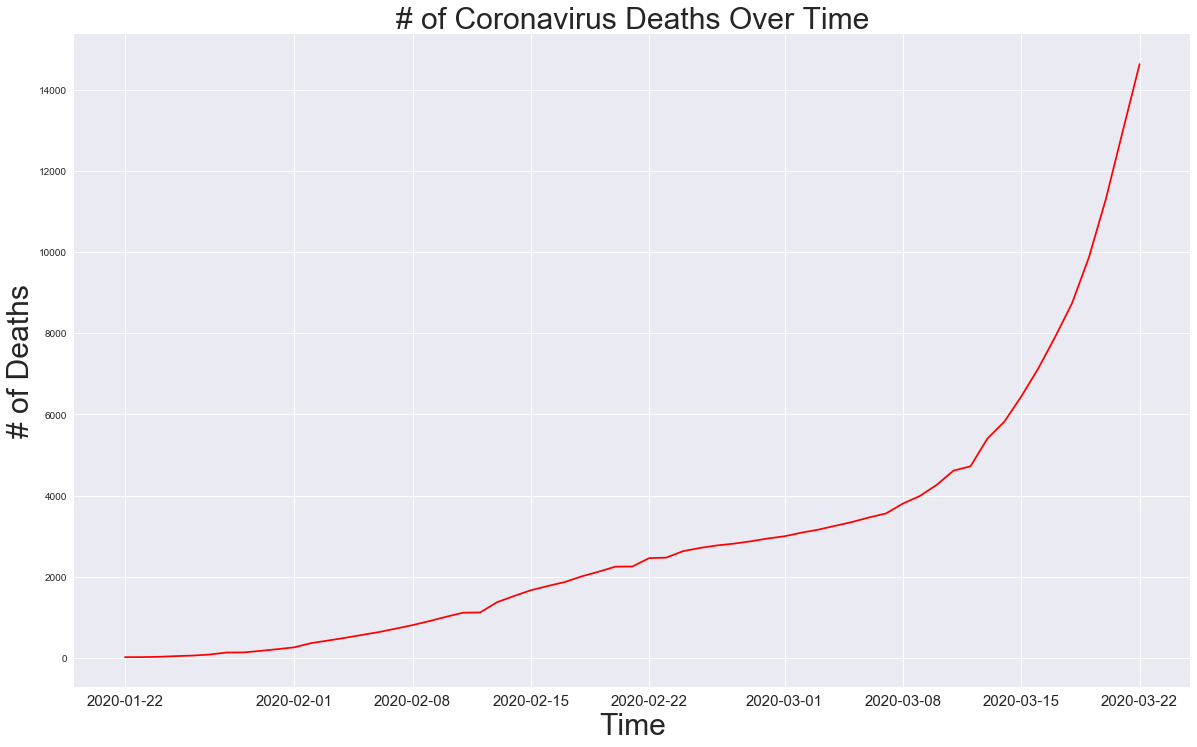

In [24]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=15)
plt.show()

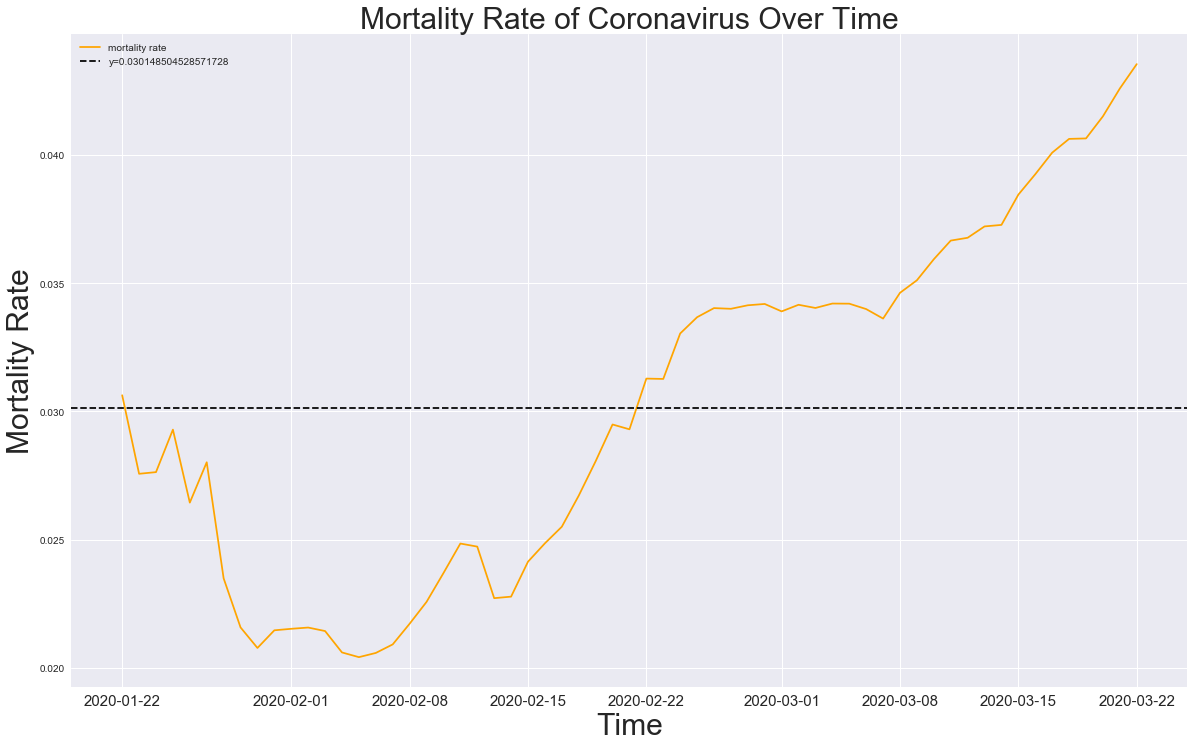

In [25]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.show()

Graphing the number of deaths and the number of recoveries

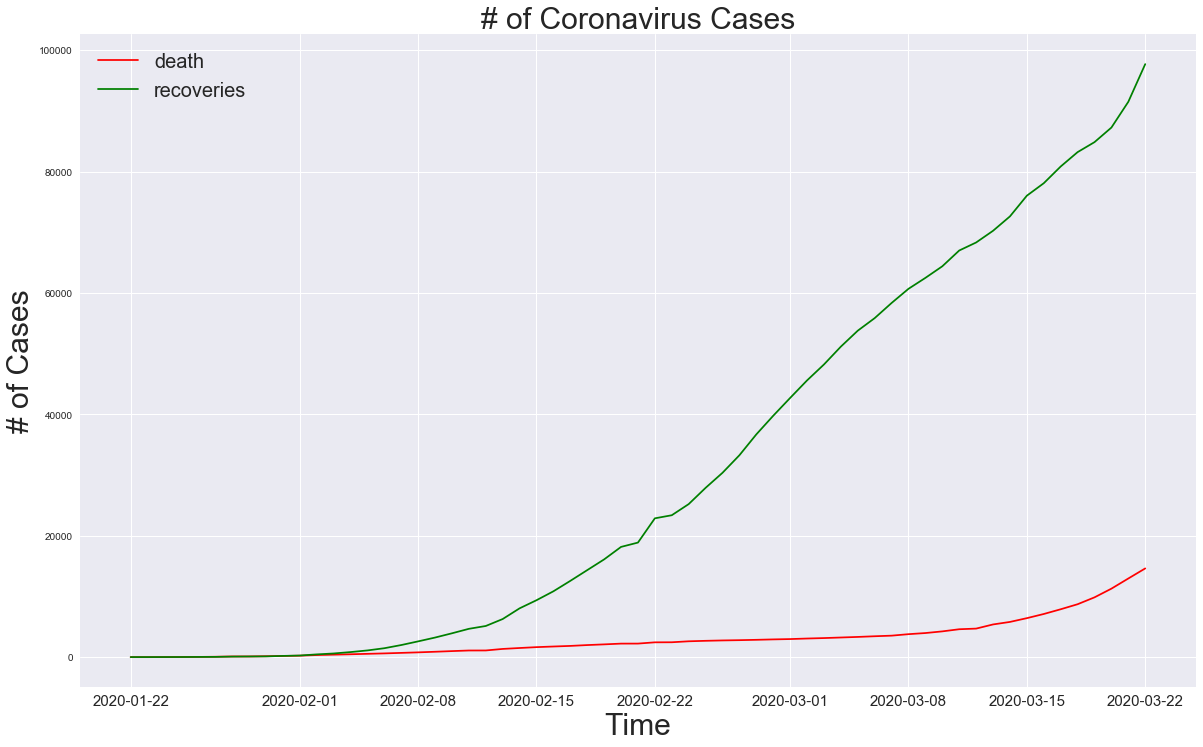

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='r')
plt.plot(x_values, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()





Plotting deaths vs recoveries

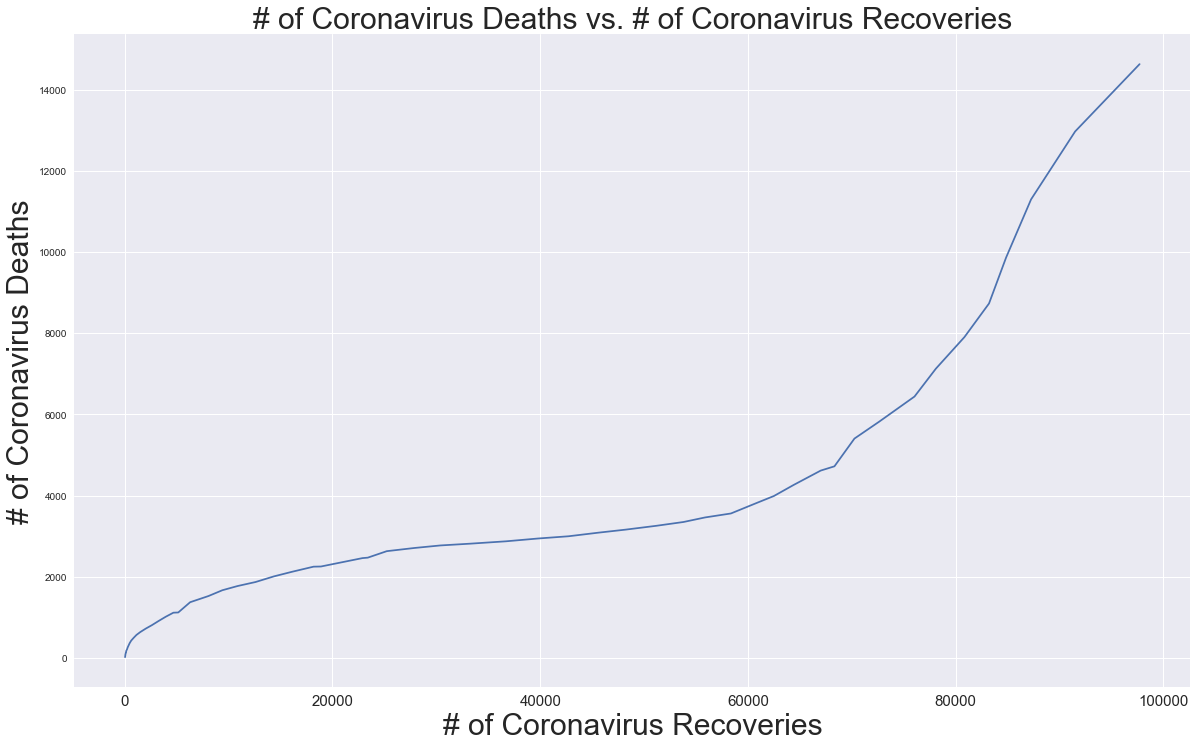

In [27]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [28]:
latest_confirmed = confirmed_df[col_fechas_ind[-1]]
latest_deaths = deaths_df[col_fechas_ind[-1]]
latest_recoveries = recoveries_df[col_fechas_ind[-1]]

Getting information about countries/regions that have confirmed coronavirus cases

In [29]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [30]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [31]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81397 cases
Italy: 59138 cases
US: 33272 cases
Spain: 28768 cases
Germany: 24873 cases
Iran: 21638 cases
France: 16176 cases
Korea, South: 8897 cases
Switzerland: 7245 cases
United Kingdom: 5741 cases
Netherlands: 4216 cases
Belgium: 3401 cases
Austria: 3244 cases
Norway: 2383 cases
Sweden: 1934 cases
Portugal: 1600 cases
Brazil: 1593 cases
Denmark: 1514 cases
Canada: 1465 cases
Australia: 1314 cases
Malaysia: 1306 cases
Turkey: 1236 cases
Czechia: 1120 cases
Japan: 1086 cases
Israel: 1071 cases
Ireland: 906 cases
Luxembourg: 798 cases
Ecuador: 789 cases
Pakistan: 776 cases
Cruise Ship: 712 cases
Poland: 634 cases
Chile: 632 cases
Finland: 626 cases
Greece: 624 cases
Thailand: 599 cases
Iceland: 568 cases
Indonesia: 514 cases
Saudi Arabia: 511 cases
Qatar: 494 cases
Singapore: 455 cases
Romania: 433 cases
Slovenia: 414 cases
India: 396 cases
Philippines: 380 cases
Russia: 367 cases
Peru: 363 cases
Bahrain: 332 cases
Egypt: 327 cases
Estonia:

In [32]:
unique_provinces =  list(confirmed_df['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

### Actualizando los datos
Con los últimos datos presentes preparamos varias gráficas agrupadas

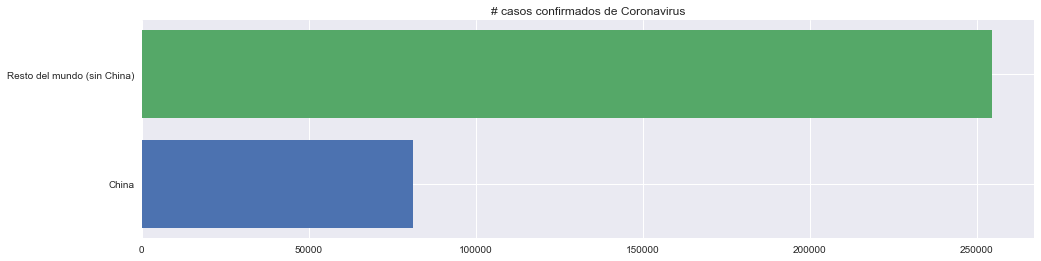

In [33]:
china_confirmed = latest_confirmed[confirmed_df['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 4))
plt.barh('China', china_confirmed)
plt.barh('Resto del mundo (sin China)', outside_mainland_china_confirmed)
plt.title('# casos confirmados de Coronavirus')
plt.show()


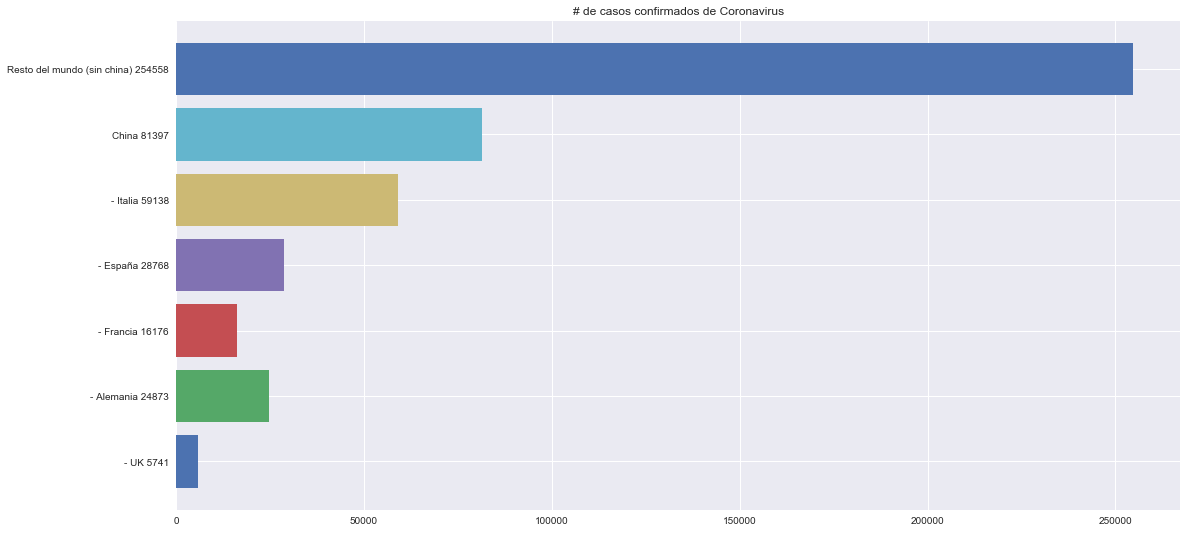

In [34]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
spain_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Spain'].sum()
italy_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Italy'].sum()
germany_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Germany'].sum()
france_confirmed = latest_confirmed[confirmed_df['Country/Region']=='France'].sum()
united_kingdom_confirmed = latest_confirmed[confirmed_df['Country/Region']=='United Kingdom'].sum()
plt.figure(figsize=(18, 9))

plt.barh('- UK {}'.format(united_kingdom_confirmed),united_kingdom_confirmed)
plt.barh('- Alemania {}'.format(germany_confirmed), germany_confirmed)
plt.barh('- Francia {}'.format(france_confirmed), france_confirmed)
plt.barh('- España {}'.format(spain_confirmed), spain_confirmed)
plt.barh('- Italia {}'.format(italy_confirmed), italy_confirmed)
plt.barh('China {}'.format(china_confirmed), china_confirmed)
plt.barh('Resto del mundo (sin china) {}'.format(outside_mainland_china_confirmed), outside_mainland_china_confirmed)

plt.title('# de casos confirmados de Coronavirus')
plt.show()

## Representaciones visuales para el mundo (barras y tartas)

In [35]:
# Mostramos los diez mayores, resto agrupamos
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

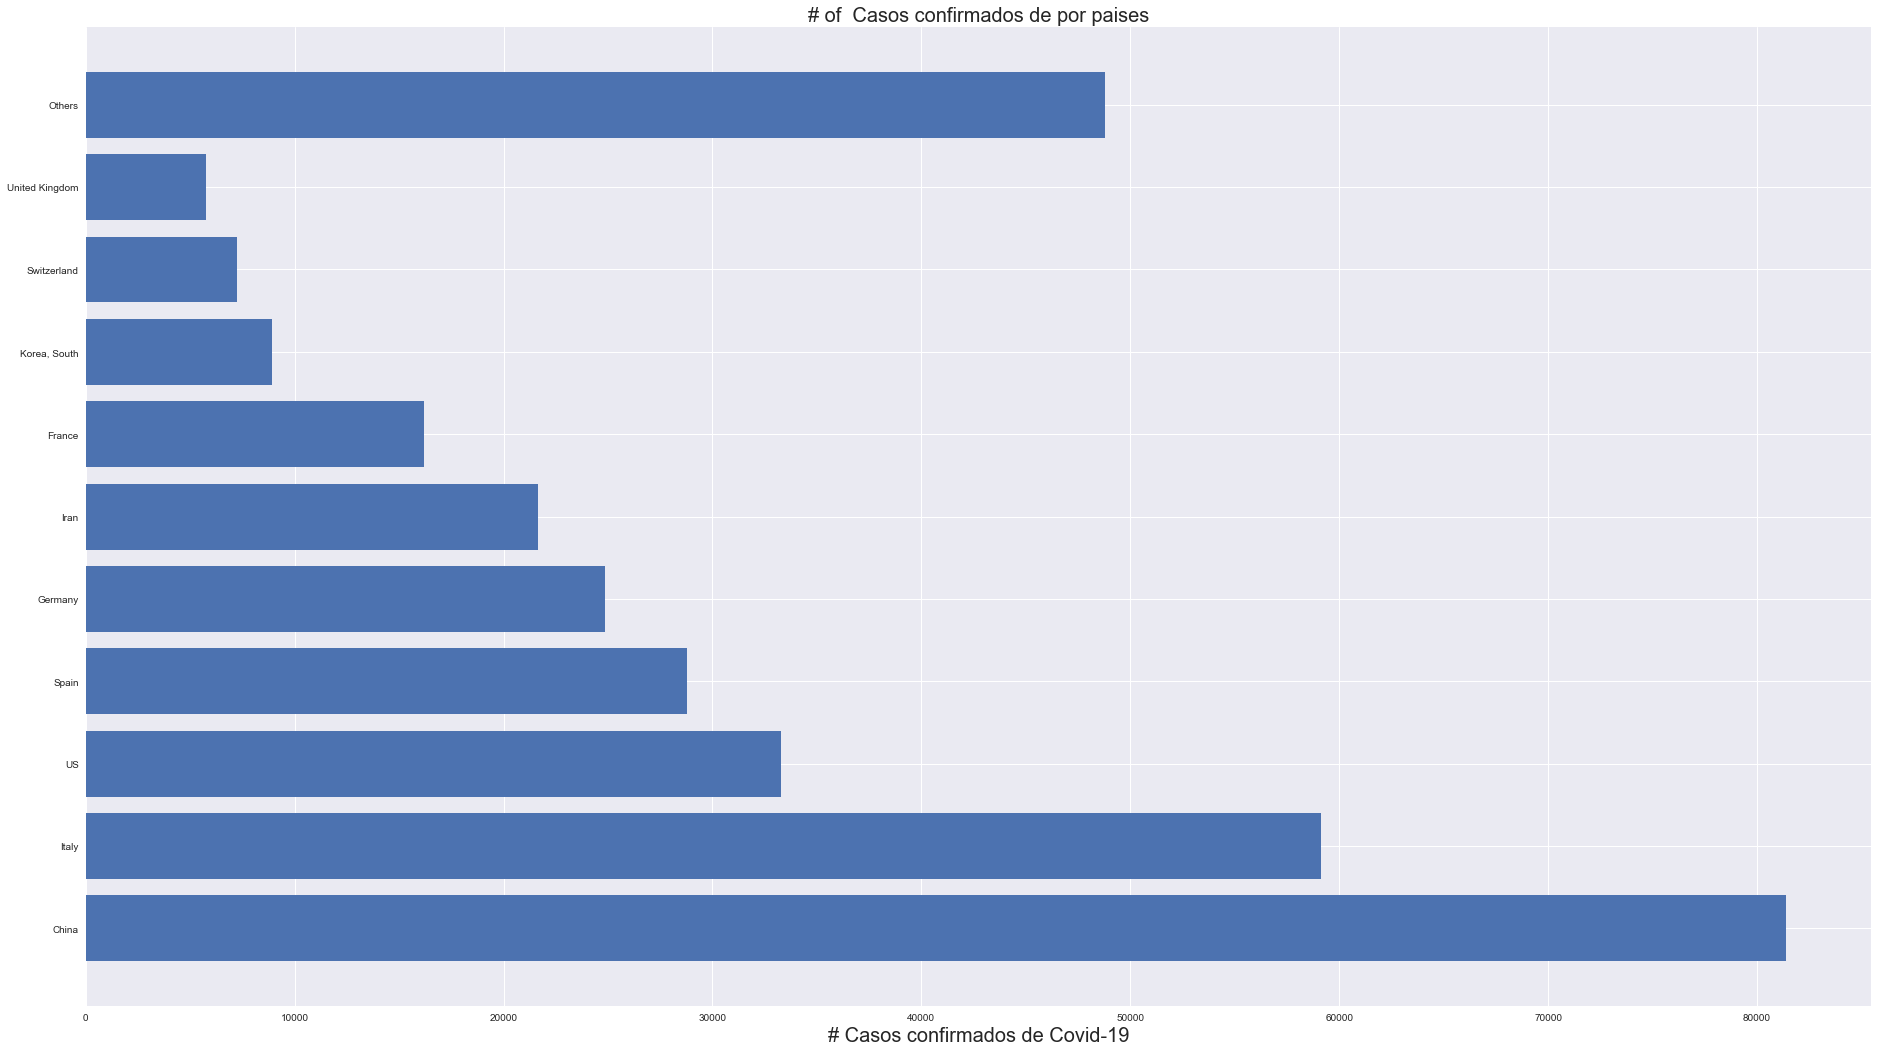

In [36]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of  Casos confirmados de por paises', size=20)
plt.xlabel('# Casos confirmados de Covid-19', size=20)
plt.show()

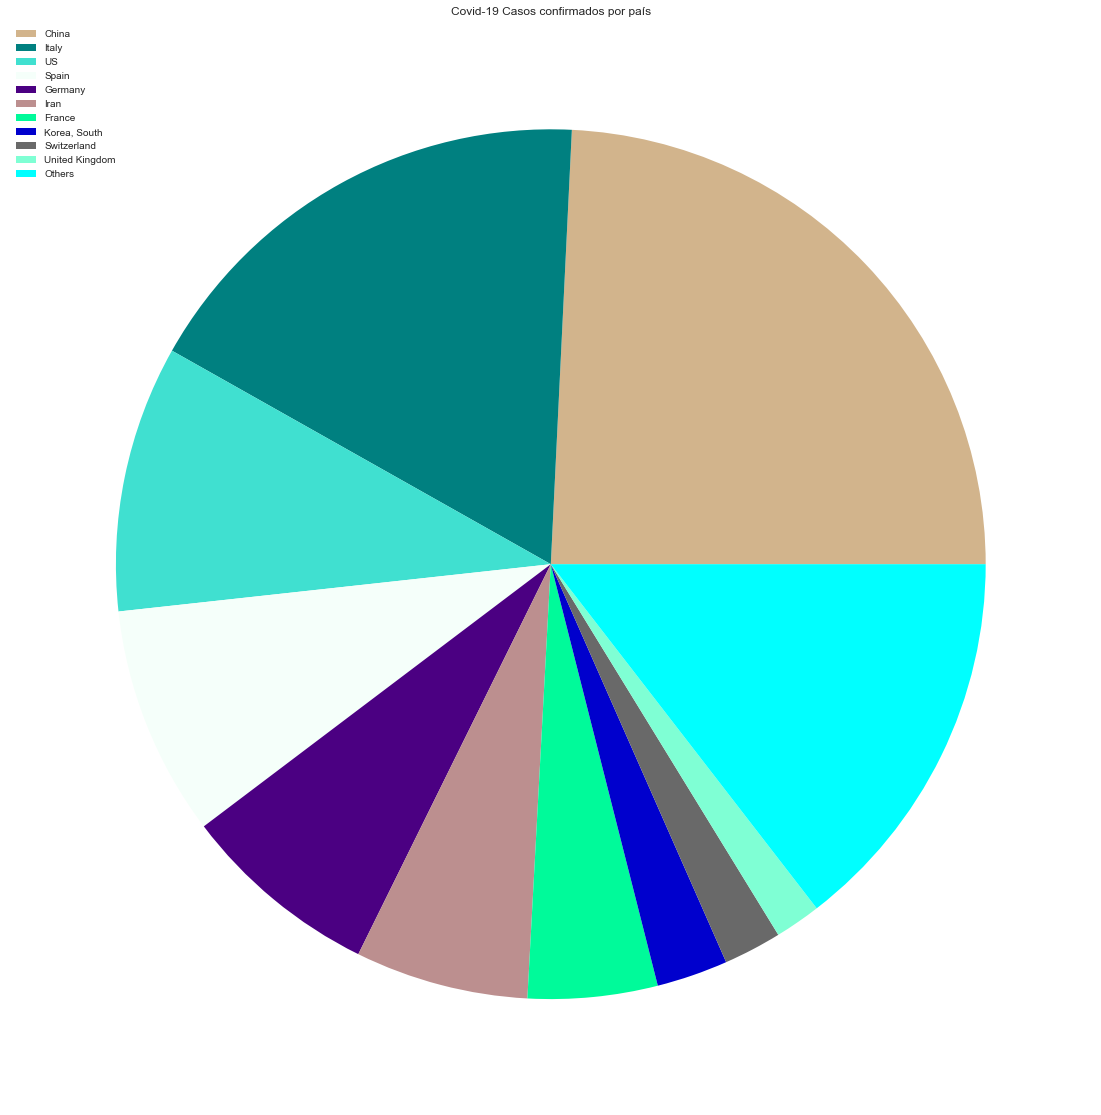

In [37]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados por país')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

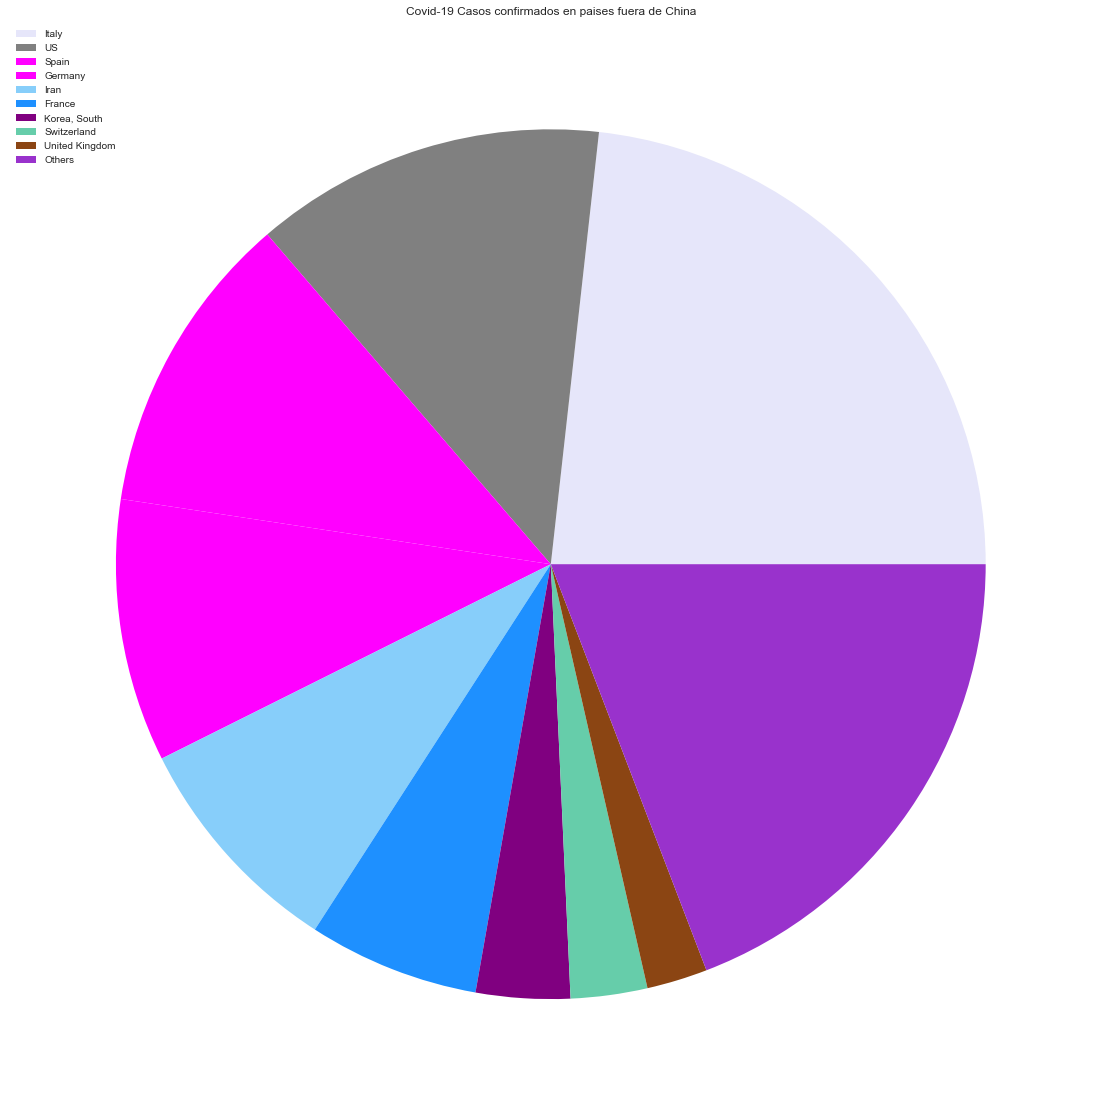

In [38]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en paises fuera de China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

In [39]:
us_regions = list(confirmed_df[confirmed_df['Country/Region']=='US']['Province/State'].unique())
us_confirmed_cases = []
no_cases = [] 
for i in us_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        us_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_regions.remove(i)

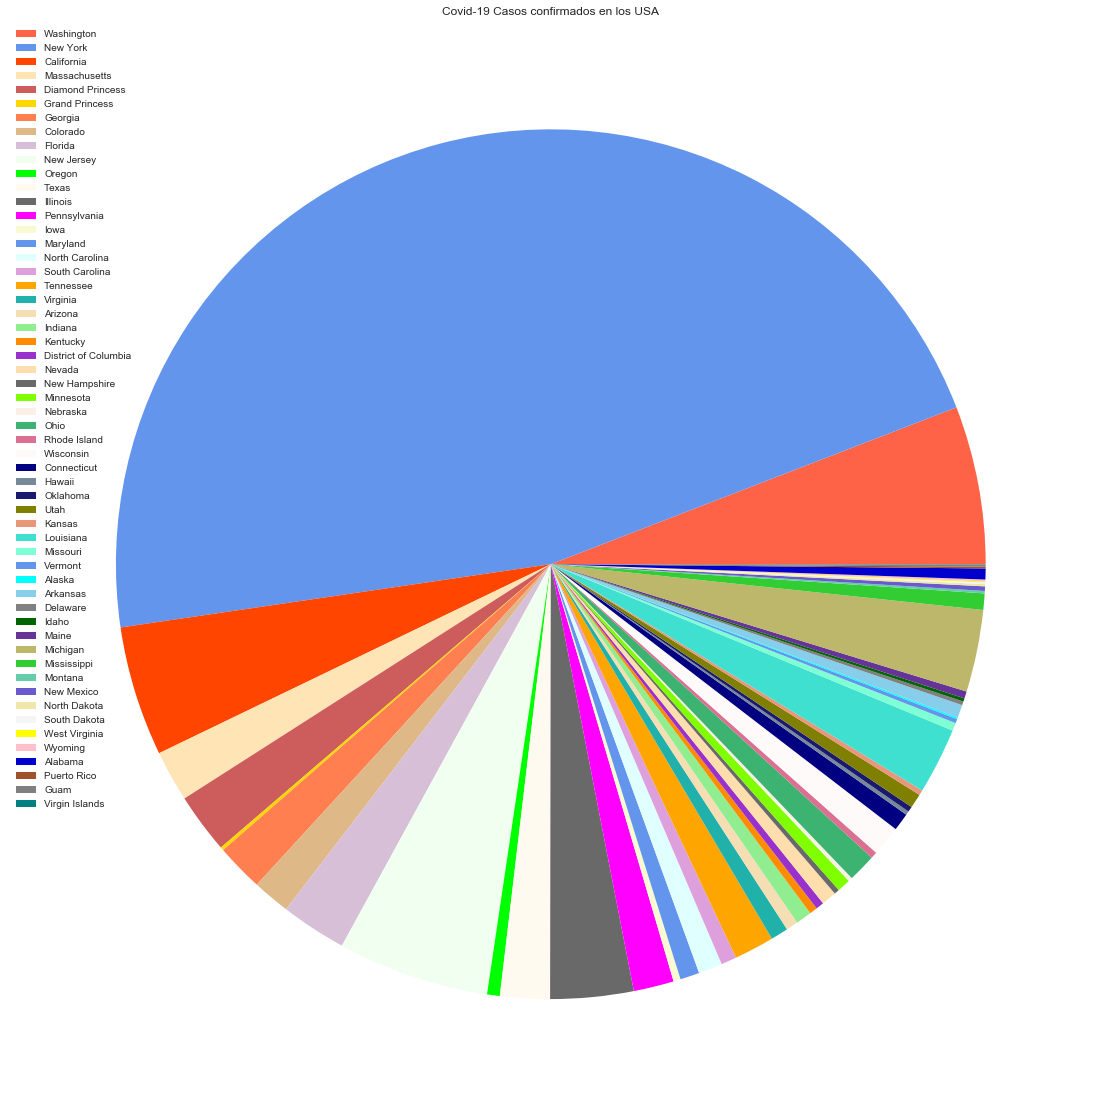

In [40]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en los USA')
plt.pie(us_confirmed_cases, colors=c)
plt.legend(us_regions, loc='best')
plt.show()